In [1]:
install.packages('dplyr')
install.packages('tidyverse')
install.packages('caret')
install.packages('BGLR')
install.packages('stringi')
install.packages('Matrix')
install.packages('plyr')

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘desc’, ‘pkgbuild’, ‘rprojroot’, ‘pkgload’, ‘praise’, ‘testthat’, ‘isoband’, ‘dbplyr’, ‘ggplot2’, ‘haven’, ‘hms’, ‘httr’, ‘modelr’, ‘purrr’, ‘reprex’, ‘rvest’, ‘tibble’, ‘xml2’


Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ModelMetrics’, ‘recipes’, ‘pROC’


Warning message in install.packages("caret"):
“installation of package ‘recipes’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘caret’ had non-zero exit status”
Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependency ‘truncnorm’


Installing package into ‘/home/jupyte

In [3]:
require('plyr')
require("dplyr")
require('BGLR')
require('tidyverse')
require('caret')

In [4]:
setwd('gxe-gee-lmm')

ERROR: Error in setwd("gxe-gee-lmm"): cannot change working directory


In [5]:
getwd()

[1] "/home/jupyter/gxe-gee-lmm"

In [155]:
## Import Data and Prep for Analysis

ERROR: Error in parse(text = x, srcfile = src): <text>:2:63: unexpected ')'
1: ## Import Data and Prep for Analysis
2: y_train[sort(as.charactery_train$Unique_ID), index.return=TRUE)
                                                                 ^


In [6]:
# Import CSV files of target data
y_train <- data.frame(read.csv('y_train_scaled.csv'))
y_test <- data.frame(read.csv('y_test_scaled.csv'))

In [7]:
y_train <- arrange(y_train, Unique_ID)
y_test <- arrange(y_test, Unique_ID)

In [8]:
head(y_train)

,Unique_ID,GRAIN_YIELD
,<fct>,<dbl>
1,10ESWYT_10002_53292_49,-0.6984829
2,10ESWYT_10002_7090_5,-0.5272796
3,10ESWYT_10002_7507_14,-0.7130147
4,10ESWYT_10002_7507_8,-0.7016617
5,10ESWYT_10002_7655_8,-0.5654257
6,10ESWYT_10002_7691_50,-0.3152056


In [9]:
rownames(y_train) = y_train$Unique_ID
rownames(y_test) = y_test$Unique_ID
y_train = subset(y_train, select = -c(Unique_ID))
y_test = subset(y_test, select = -c(Unique_ID))

In [10]:
head(y_train)

,GRAIN_YIELD
,<dbl>
10ESWYT_10002_53292_49,-0.6984829
10ESWYT_10002_7090_5,-0.5272796
10ESWYT_10002_7507_14,-0.7130147
10ESWYT_10002_7507_8,-0.7016617
10ESWYT_10002_7655_8,-0.5654257
10ESWYT_10002_7691_50,-0.3152056


In [16]:
head(y_test)

,GRAIN_YIELD
,<dbl>
10ESWYT_10002_8169_5,-0.5217354
10ESWYT_10002_8176_7,-0.5868307
10ESWYT_10018_7691_50,0.5826089
10ESWYT_10018_7707_6,0.0222429
10ESWYT_10018_7817_13,-0.1461855
10ESWYT_10018_7896_254,0.3941511


In [11]:
print(dim(y_train))
print(dim(y_test))

[1] 122484      1
[1] 21615     1


In [12]:
# Import CSV files of environmental data for CIMMYT and GEE
W_CIMMYT_train <- read.csv('X_train_scaled.csv')
W_CIMMYT_test <- read.csv('X_test_scaled.csv')
#W_gee_train <- read.csv('X_train_gee_scaled.csv')
#W_gee_test <- read.csv('X_test_gee_scaled.csv')

print(dim(W_CIMMYT_train))
print(dim(W_CIMMYT_test))
# print(dim(W_gee_train))
# print(dim(W_gee_test))

[1] 122484     59
[1] 21615    59


In [13]:
W_CIMMYT_train <- arrange(W_CIMMYT_train, Unique_ID)
W_CIMMYT_test <- arrange(W_CIMMYT_test, Unique_ID)
# W_gee_train <- arrange(W_gee_train, Unique_ID)
# W_gee_test <- arrange(W_gee_test, Unique_ID)

rownames(W_CIMMYT_train) = W_CIMMYT_train$Unique_ID
rownames(W_CIMMYT_test) = W_CIMMYT_test$Unique_ID
# rownames(W_gee_train) = W_gee_train$Unique_ID
# rownames(W_gee_test) = W_gee_test$Unique_ID

W_CIMMYT_train <- subset(W_CIMMYT_train, select = -c(Unique_ID))
W_CIMMYT_test <- subset(W_CIMMYT_test, select = -c(Unique_ID))
# W_gee_train <- subset(W_gee_train, select = -c(Unique_ID))
# W_gee_test <- subset(W_gee_test, select = -c(Unique_ID))

In [32]:
head(W_CIMMYT_train)

,ALTITUDE,PPN_10TH_MO_BEFORE_HARVESTED,PPN_11TH_MO_BEFORE_HARVESTED,PPN_1ST_MO_BEFORE_HARVESTED,PPN_2ND_MO_BEFORE_HARVESTED,PPN_3RD_MO_BEFORE_HARVESTED,PPN_4TH_MO_BEFORE_HARVESTED,PPN_5TH_MO_BEFORE_HARVESTED,PPN_6TH_MO_BEFORE_HARVESTED,PPN_7TH_MO_BEFORE_HARVESTED,⋯,ROOT_DISEASE_DEVELOPMENT_SLIGHT,ROOT_DISEASE_DEVELOPMENT_TRACES,HAIL_DAMAGE_MODERATE,HAIL_DAMAGE_SEVERE,HAIL_DAMAGE_SLIGHT,HAIL_DAMAGE_TRACES,FROST_DAMAGE_SPIKE_MODERATE,FROST_DAMAGE_SPIKE_SEVERE,FROST_DAMAGE_SPIKE_SLIGHT,FROST_DAMAGE_SPIKE_TRACES
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10ESWYT_10002_53292_49,1.774772,0.04338326,-0.5933926,-0.4967931,1.613103,0.5676012,0.3561074,1.055685,0.7296768,-0.4944114,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7090_5,1.774772,0.04338326,-0.5933926,-0.4967931,1.613103,0.5676012,0.3561074,1.055685,0.7296768,-0.4944114,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7507_14,1.774772,0.04338326,-0.5933926,-0.4967931,1.613103,0.5676012,0.3561074,1.055685,0.7296768,-0.4944114,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7507_8,1.774772,0.04338326,-0.5933926,-0.4967931,1.613103,0.5676012,0.3561074,1.055685,0.7296768,-0.4944114,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7655_8,1.774772,0.04338326,-0.5933926,-0.4967931,1.613103,0.5676012,0.3561074,1.055685,0.7296768,-0.4944114,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7691_50,1.774772,0.04338326,-0.5933926,-0.4967931,1.613103,0.5676012,0.3561074,1.055685,0.7296768,-0.4944114,⋯,0,0,0,0,0,0,0,0,0,0


In [31]:
head(W_CIMMYT_test)

,ALTITUDE,PPN_10TH_MO_BEFORE_HARVESTED,PPN_11TH_MO_BEFORE_HARVESTED,PPN_1ST_MO_BEFORE_HARVESTED,PPN_2ND_MO_BEFORE_HARVESTED,PPN_3RD_MO_BEFORE_HARVESTED,PPN_4TH_MO_BEFORE_HARVESTED,PPN_5TH_MO_BEFORE_HARVESTED,PPN_6TH_MO_BEFORE_HARVESTED,PPN_7TH_MO_BEFORE_HARVESTED,⋯,ROOT_DISEASE_DEVELOPMENT_SLIGHT,ROOT_DISEASE_DEVELOPMENT_TRACES,HAIL_DAMAGE_MODERATE,HAIL_DAMAGE_SEVERE,HAIL_DAMAGE_SLIGHT,HAIL_DAMAGE_TRACES,FROST_DAMAGE_SPIKE_MODERATE,FROST_DAMAGE_SPIKE_SEVERE,FROST_DAMAGE_SPIKE_SLIGHT,FROST_DAMAGE_SPIKE_TRACES
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10ESWYT_10002_8169_5,1.7618796,0.04812003,-0.5904242,-0.4866035,1.5916974,0.5555279,0.3658543,1.0783413,0.7205583,-0.4853275,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_8176_7,1.7618796,0.04812003,-0.5904242,-0.4866035,1.5916974,0.5555279,0.3658543,1.0783413,0.7205583,-0.4853275,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10018_7691_50,-0.4957528,-0.62969303,-0.1757944,0.0685568,-0.5355841,-0.5452105,0.2283444,-0.4871009,0.2254536,-0.2154733,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10018_7707_6,-0.4957528,-0.62969303,-0.1757944,0.0685568,-0.5355841,-0.5452105,0.2283444,-0.4871009,0.2254536,-0.2154733,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10018_7817_13,-0.4957528,-0.62969303,-0.1757944,0.0685568,-0.5355841,-0.5452105,0.2283444,-0.4871009,0.2254536,-0.2154733,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10018_7896_254,-0.4957528,-0.62969303,-0.1757944,0.0685568,-0.5355841,-0.5452105,0.2283444,-0.4871009,0.2254536,-0.2154733,⋯,0,0,0,0,0,0,0,0,0,0


In [30]:
print(dim(W_CIMMYT_train))
print(dim(W_CIMMYT_test))

[1] 122484     58
[1] 21615    58


In [17]:
# Import pedigree matrix
A <- read.csv('A_matrix_unique.csv', row.names = 1)

In [18]:
dim(A)

[1] 3489 3489

In [19]:
# A matrix doesn't read in well as a CSV, need to repeat some processing steps
# Remove the X prefix from the column names
names(A) <- substring(names(A),2)
A <- A[order(rownames(A)),order(names(A))]
print(colnames(A)[1])
print(rownames(A)[1])

[1] "100507"
[1] "100507"


In [20]:
A[1:5,1:5]

,100507,100761,1047493,1050296,1058137
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100507,1.5,0.000000,0.0000000,0.0000000,0.0000000
100761,0.0,1.527344,0.0000000,0.0000000,0.0000000
1047493,0.0,0.000000,1.5905526,0.5575323,0.2434399
1050296,0.0,0.000000,0.5575323,1.6102377,0.2187396
1058137,0.0,0.000000,0.2434399,0.2187396,1.4766731


In [21]:
dim(A)

[1] 3489 3489

In [22]:
X_train_GID <- read.csv('X_train_GID.csv')
X_test_GID <- read.csv('X_test_GID.csv')

In [23]:
X_train_GID <- arrange(X_train_GID, Unique_ID)
X_test_GID <- arrange(X_test_GID, Unique_ID)

rownames(X_train_GID) = X_train_GID$Unique_ID
rownames(X_test_GID) = X_test_GID$Unique_ID

X_train_GID <- subset(X_train_GID, select = -c(Unique_ID))
X_test_GID <- subset(X_test_GID, select = -c(Unique_ID))

In [24]:
head(X_train_GID)

,GID
,<int>
10ESWYT_10002_53292_49,86355
10ESWYT_10002_7090_5,27001
10ESWYT_10002_7507_14,30977
10ESWYT_10002_7507_8,41243
10ESWYT_10002_7655_8,42076
10ESWYT_10002_7691_50,3895


In [25]:
dim(X_train_GID)

[1] 122484      1

## Run Model on Sample of Data

Full dataset is too large, creates a 156Gb matrix and crashes the instance

In [200]:
# Set Sample Indices
# train_random_sample <- sample(nrow(y_train), size = (nrow(y_train) * 1))
# test_random_sample <- sample(nrow(y_test), size = (nrow(y_test) * 1))

In [201]:
# Sample Target Data
# y_train_sample <- as.data.frame(y_train[train_random_sample,], row.names = row.names(y_train)[train_random_sample])
# colnames(y_train_sample) <- c('GRAIN_YIELD')
# y_test_sample <- as.data.frame(y_test[test_random_sample,], row.names = row.names(y_test)[test_random_sample])
# colnames(y_test_sample) <- c('GRAIN_YIELD')

# # Sample CIMMYT Environmental Data
# W_CIMMYT_train_sample <- W_CIMMYT_train[train_random_sample,]
# W_CIMMYT_test_sample <- W_CIMMYT_test[test_random_sample,]

# # Sample GEE Environmental Data
# W_gee_train_sample <- W_gee_train[train_random_sample,]
# W_gee_test_sample <- W_gee_test[test_random_sample,]

# # Sample Unique GID List
# X_train_GID_sample <- as.data.frame(X_train_GID[train_random_sample,], row.names = row.names(X_train_GID)[train_random_sample])
# colnames(X_train_GID_sample) <- c('GID')
# X_test_GID_sample <- as.data.frame(X_test_GID[test_random_sample,], row.names = row.names(X_test_GID)[test_random_sample])
# colnames(X_test_GID_sample) <- c('GID')

In [ ]:
# # Combine Train and Test but keep index of separation
# y_sample <- rbind(y_train_sample,y_test_sample)
# W_CIMMYT_sample <- rbind(W_CIMMYT_train_sample, W_CIMMYT_test_sample)
# W_gee_sample <- rbind(W_gee_train_sample, W_gee_test_sample)
# X_GID_sample <- rbind(X_train_GID_sample, X_test_GID_sample)
# print(length(y_sample[train_random_sample,]))
# print(length(y_sample[test_random_sample,]))
# print(length(X_GID_sample[train_random_sample,]))
# print(length(X_GID_sample[test_random_sample,]))

In [52]:
# Combine Train and Test but keep index of separation
y <- rbind(as.data.frame(y_train),as.data.frame(y_test))
W_CIMMYT <- rbind(as.data.frame(W_CIMMYT_train), as.data.frame(W_CIMMYT_test))
# W_gee_sample <- rbind(W_gee_train_sample, W_gee_test_sample)
X_GID <- rbind(as.data.frame(X_train_GID), as.data.frame(X_test_GID))

In [60]:
head(y)
print(dim(y))

,GRAIN_YIELD
,<dbl>
10ESWYT_10002_53292_49,-0.6984829
10ESWYT_10002_7090_5,-0.5272796
10ESWYT_10002_7507_14,-0.7130147
10ESWYT_10002_7507_8,-0.7016617
10ESWYT_10002_7655_8,-0.5654257
10ESWYT_10002_7691_50,-0.3152056


[1] 144099      1


In [61]:
head(W_CIMMYT)
print(dim(W_CIMMYT))

,ALTITUDE,PPN_10TH_MO_BEFORE_HARVESTED,PPN_11TH_MO_BEFORE_HARVESTED,PPN_1ST_MO_BEFORE_HARVESTED,PPN_2ND_MO_BEFORE_HARVESTED,PPN_3RD_MO_BEFORE_HARVESTED,PPN_4TH_MO_BEFORE_HARVESTED,PPN_5TH_MO_BEFORE_HARVESTED,PPN_6TH_MO_BEFORE_HARVESTED,PPN_7TH_MO_BEFORE_HARVESTED,⋯,ROOT_DISEASE_DEVELOPMENT_SLIGHT,ROOT_DISEASE_DEVELOPMENT_TRACES,HAIL_DAMAGE_MODERATE,HAIL_DAMAGE_SEVERE,HAIL_DAMAGE_SLIGHT,HAIL_DAMAGE_TRACES,FROST_DAMAGE_SPIKE_MODERATE,FROST_DAMAGE_SPIKE_SEVERE,FROST_DAMAGE_SPIKE_SLIGHT,FROST_DAMAGE_SPIKE_TRACES
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10ESWYT_10002_53292_49,1.774772,0.04338326,-0.5933926,-0.4967931,1.613103,0.5676012,0.3561074,1.055685,0.7296768,-0.4944114,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7090_5,1.774772,0.04338326,-0.5933926,-0.4967931,1.613103,0.5676012,0.3561074,1.055685,0.7296768,-0.4944114,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7507_14,1.774772,0.04338326,-0.5933926,-0.4967931,1.613103,0.5676012,0.3561074,1.055685,0.7296768,-0.4944114,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7507_8,1.774772,0.04338326,-0.5933926,-0.4967931,1.613103,0.5676012,0.3561074,1.055685,0.7296768,-0.4944114,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7655_8,1.774772,0.04338326,-0.5933926,-0.4967931,1.613103,0.5676012,0.3561074,1.055685,0.7296768,-0.4944114,⋯,0,0,0,0,0,0,0,0,0,0
10ESWYT_10002_7691_50,1.774772,0.04338326,-0.5933926,-0.4967931,1.613103,0.5676012,0.3561074,1.055685,0.7296768,-0.4944114,⋯,0,0,0,0,0,0,0,0,0,0


[1] 144099     58


In [81]:
head(X_GID)
print(dim(X_GID))

[1] 27001

[1] 144099      1


In [69]:
#set.seed(123)
#training.samples <- y_sample$GRAIN_YIELD %>%
#  createDataPartition(p = 0.9, list = FALSE)

test_id_pos = y[rownames(y_test),]
head(test_id_pos)

[1] -0.5217354 -0.5868307  0.5826089  0.0222429 -0.1461855  0.3941511

In [113]:
train_rows = nrow(y_train)

In [117]:
y_train_na = y$GRAIN_YIELD

In [118]:
y_train_na[-seq_len(train_rows)] = NA

In [119]:
head(y_train_na)

[1] -0.6984829 -0.5272796 -0.7130147 -0.7016617 -0.5654257 -0.3152056

In [120]:
length(y_train_na)

[1] 144099

In [122]:
head(y_train_na[seq_len(train_rows)])

[1] -0.6984829 -0.5272796 -0.7130147 -0.7016617 -0.5654257 -0.3152056

In [123]:
head(y_train_na[-seq_len(train_rows)])

[1] NA NA NA NA NA NA

## Model 1: Main Variety Effects

In [125]:
# Fitting Model 1 (Main Environment-Line Effects)
# (EL)

# incidence matrix for main eff. of environments.
# ZE = model.matrix(~factor(Y$ENV)-1)     

# incidence matrix for main eff. of lines.
X_GID$GID = factor(x=X_GID$GID,levels=rownames(A),ordered=TRUE)
ZVAR = model.matrix(~X_GID$GID-1)
print(dim(ZVAR))
print(length(y_train_na))

[1] 144099   3489
[1] 144099


In [ ]:
# Model Fitting

# ETA = list(ENV=list(X=ZE,model='BRR'),
#            VAR=list(X=ZVAR,model='BRR'))

ETA = list(VAR=list(X=ZVAR,model='BRR'))

fm1 = BGLR(y=y_train_na,ETA=ETA,saveAt='M1_',nIter=1000,burnIn=500)

In [127]:
head(fm1$yHat[-seq_len(train_rows)])

[1] -0.09714218 -0.06204756  0.06447360 -0.21271648 -0.01030067  0.15270215

In [128]:
head(y$GRAIN_YIELD[-seq_len(train_rows)])

[1] -0.5217354 -0.5868307  0.5826089  0.0222429 -0.1461855  0.3941511

          R2      RMSE       MAE
1 0.03020309 0.9847969 0.7838775


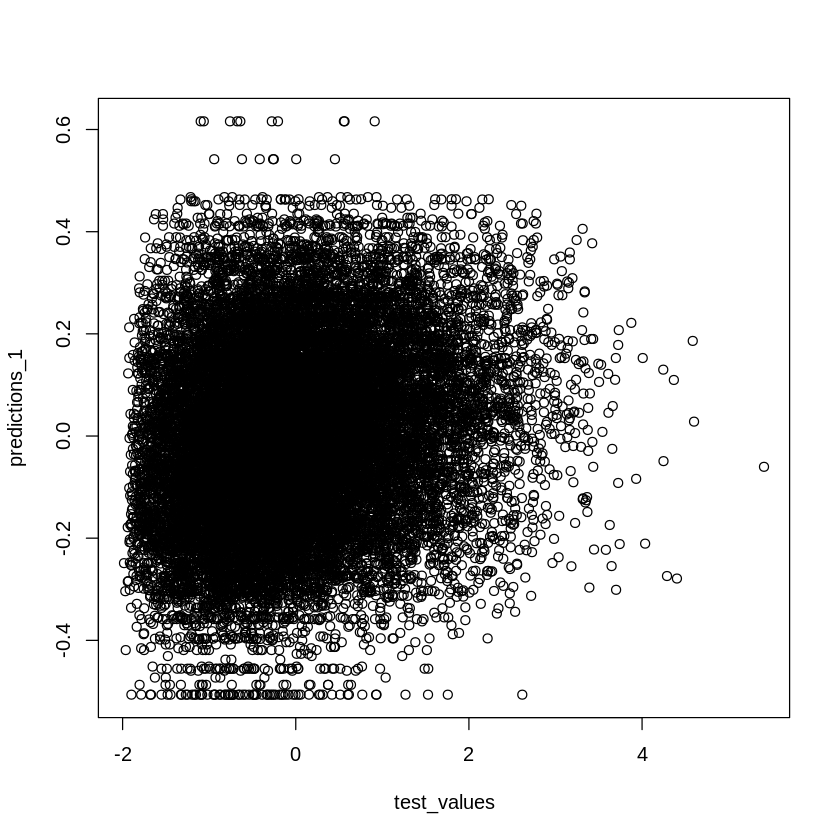

In [129]:
predictions_1 = fm1$yHat[-seq_len(train_rows)]
test_values = y$GRAIN_YIELD[-seq_len(train_rows)]
R2 = R2(predictions_1, test_values)
RMSE = RMSE(predictions_1, test_values)
MAE = MAE(predictions_1, test_values)
model1_scores = data.frame(R2, RMSE, MAE)
print(model1_scores)
plot(test_values,predictions_1)

## Model 2: Main Pedigree Effects 

In [130]:
# Alternative Model 2 with Eigendecomposition

L_star = eigen(A, symmetric =TRUE)
Gamma = L_star$vectors
Lambda = L_star$values 
Z_star = ZVAR%*%Gamma%*%(Lambda^0.5)

In [131]:
# Fitting Model 2 with Alternative Z_star (Main Environment-Pedigree Effects)
# (EA)

# ETA = list(ENV=list(X=ZE,model='BRR'),
#            PED=list(X=Z_star,model='BRR'))

ETA = list(PED=list(X=Z_star,model='BRR'))

In [132]:
fm2 = BGLR(y=y_train_na,ETA=ETA,saveAt='M2_',nIter=2000,burnIn=500)




#--------------------------------------------------------------------#

#        _\\|//_                                                     #

#       (` o-o ')      BGLR v1.0.8                                   #

#------ooO-(_)-Ooo---------------------------------------------------#

#                      Bayesian Generalized Linear Regression        #

#                      Gustavo de los Campos, gdeloscampos@gmail.com #

#    .oooO     Oooo.   Paulino Perez-Rodriguez, perpdgo@gmail.com    #

#    (   )     (   )   November, 2018                                #

#_____\ (_______) /_________________________________________________ #

#      \_)     (_/                                                   #

#                                                                    #

#------------------------------------------------------------------- #




Degree of freedom of LP 1  set to default value (5)

Scale parameter of LP 1  set to default value (2.4482210651294)

------------

            R2      RMSE      MAE
1 8.654861e-05 0.9999811 0.797732


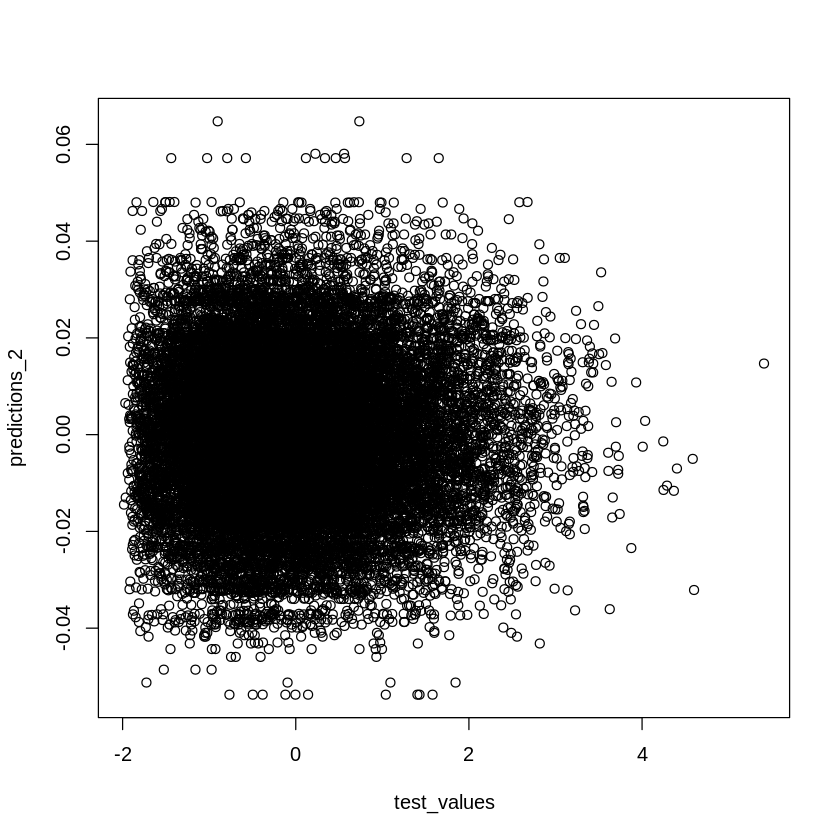

In [134]:
predictions_2 = fm2$yHat[-seq_len(train_rows)]
test_values = y$GRAIN_YIELD[-seq_len(train_rows)]
R2 = R2(predictions_2, test_values)
RMSE = RMSE(predictions_2, test_values)
MAE = MAE(predictions_2, test_values)
model2_scores = data.frame(R2, RMSE, MAE)
print(model2_scores)
plot(test_values,predictions_2)

## Model 3: Just Environment Main Effects

In [136]:
W_CIMMYT_div = W_CIMMYT/sqrt(ncol(W_CIMMYT))

In [137]:
# Model 3 with just EC - CIMMYT
ETA = list(EC=list(X=W_CIMMYT_div,model='BRR'))

In [ ]:
fm3_ec_CIMMYT = BGLR(y=y_train_na,ETA=ETA,saveAt='M3_',nIter=2000,burnIn=500)

         R2     RMSE      MAE
1 0.1126858 0.941976 0.744164


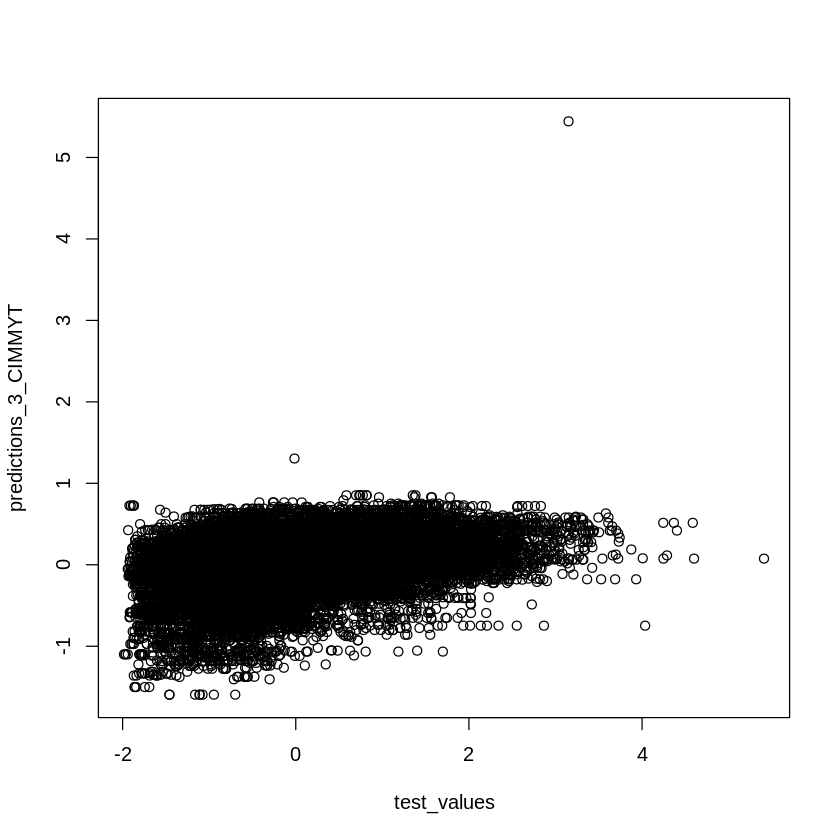

In [139]:
predictions_3_CIMMYT = fm3_ec_CIMMYT$yHat[-seq_len(train_rows)]
test_values = y$GRAIN_YIELD[-seq_len(train_rows)]
R2 = R2(predictions_3_CIMMYT, test_values)
corr = cor(predictions_3_CIMMYT, test_values)
RMSE = RMSE(predictions_3_CIMMYT, test_values)
MAE = MAE(predictions_3_CIMMYT, test_values)
model3_CIMMYT_scores = data.frame(R2, RMSE, MAE)
print(model3_CIMMYT_scores)
plot(test_values,predictions_3_CIMMYT)

In [60]:
W_gee_sample_div = W_gee_sample/sqrt(ncol(W_gee_sample))

In [61]:
# Model 3 with just EC - GEE
ETA = list(EC=list(X=W_gee_sample_div,model='BRR'))

In [ ]:
fm3_ec_gee = BGLR(y=y_train_na,ETA=ETA,saveAt='M3_',nIter=500,burnIn=200)

           R2      RMSE       MAE
1 0.001259028 0.9993682 0.7963942


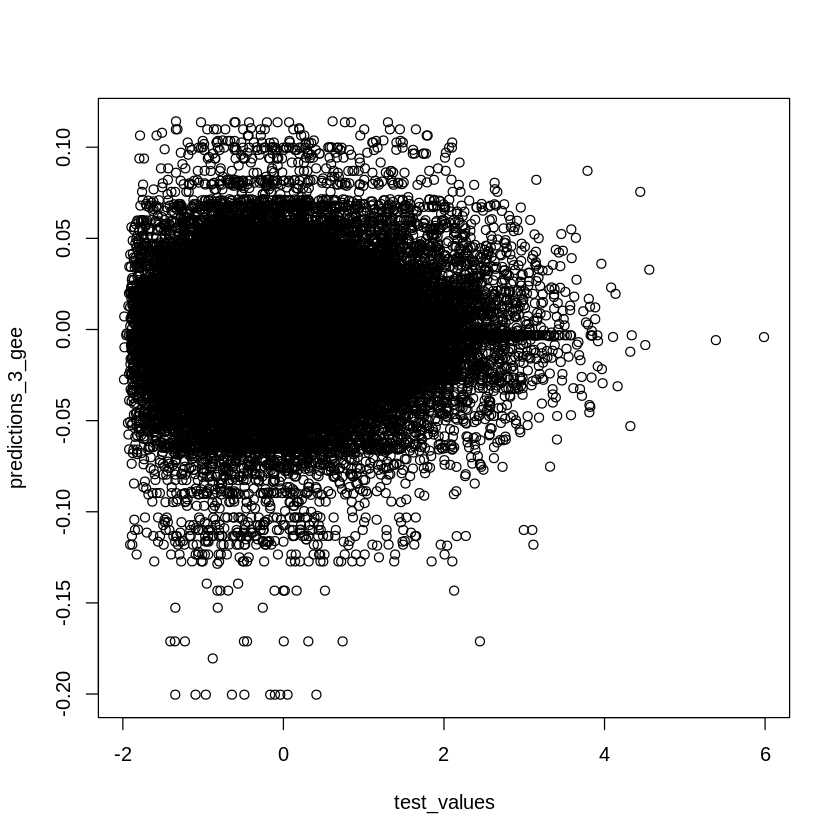

In [63]:
predictions_3_gee = fm3_ec_gee$yHat[-seq_len(train_rows)]
test_values = y_sample$GRAIN_YIELD[-seq_len(train_rows)]
R2 = R2(predictions_3_gee, test_values)
corr = cor(predictions_3_gee, test_values)
RMSE = RMSE(predictions_3_gee, test_values)
MAE = MAE(predictions_3_gee, test_values)
model3_CIMMYT_scores = data.frame(R2, RMSE, MAE)
print(model3_CIMMYT_scores)
plot(test_values,predictions_3_gee)

## Model 4: Main Pedigree and Environment Effects

In [ ]:
# Fitting Model 3_CIMMYT (Main Environment-Pedigree-Environmental Covariate Effects)
# (EAW)

In [140]:
ETA = list(PED=list(X=Z_star,model='BRR'),
           EC=list(X=W_CIMMYT_div,model='BRR'))

In [ ]:
fm4_CIMMYT = BGLR(y=y_train_na,ETA=ETA,saveAt='M4_CIM_',nIter=2000,burnIn=500)

         R2      RMSE       MAE
1 0.1126958 0.9419739 0.7441788


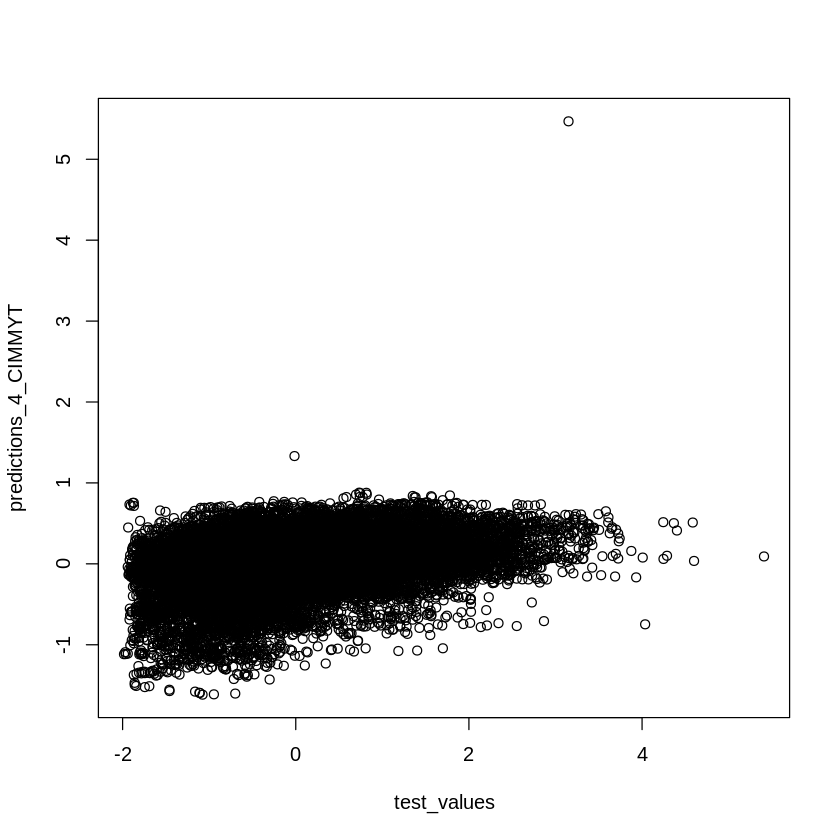

In [142]:
predictions_4_CIMMYT = fm4_CIMMYT$yHat[-seq_len(train_rows)]
test_values = y$GRAIN_YIELD[-seq_len(train_rows)]
R2 = R2(predictions_4_CIMMYT, test_values)
RMSE = RMSE(predictions_4_CIMMYT, test_values)
MAE = MAE(predictions_4_CIMMYT, test_values)
model4_CIMMYT_scores = data.frame(R2, RMSE, MAE)
print(model4_CIMMYT_scores)
plot(test_values,predictions_4_CIMMYT)

In [ ]:
# Fitting Model 3_GEE (Main Environment-Pedigree-Environmental Covariate Effects)
# (EAW)

W_gee_sample_div = W_gee_sample/sqrt(ncol(W_gee_sample))

In [67]:
ETA = list(PED=list(X=Z_star,model='BRR'),
           EC=list(X=W_gee_sample_div,model='BRR'))

In [ ]:
fm4_gee = BGLR(y=y_train_na,ETA=ETA,saveAt='M3_',nIter=500,burnIn=200)


           R2      RMSE       MAE
1 0.001161632 0.9994316 0.7966025


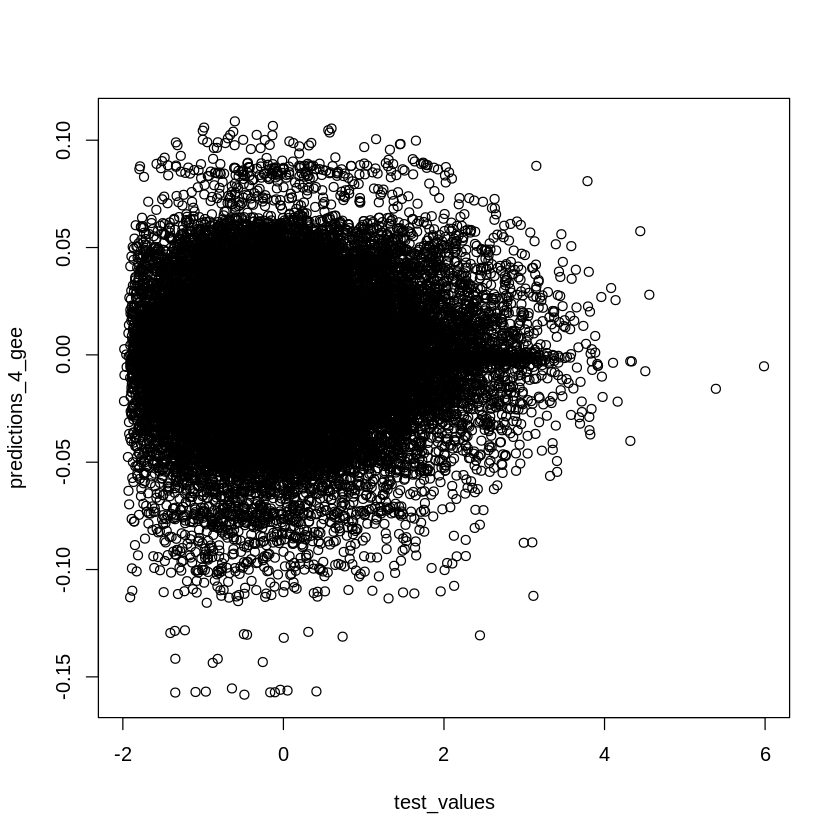

In [69]:
predictions_4_gee = fm4_gee$yHat[-seq_len(train_rows)]
test_values = y_sample$GRAIN_YIELD[-seq_len(train_rows)]
R2 = R2(predictions_4_gee, test_values)
RMSE = RMSE(predictions_4_gee, test_values)
MAE = MAE(predictions_4_gee, test_values)
model4_gee_scores = data.frame(R2, RMSE, MAE)
print(model4_gee_scores)
plot(test_values,predictions_4_gee)

## Model 5: Main Pedigree, Main Environment, and Interaction Effects

In [145]:
# Fitting Model 5 (Main Environment-Pedigree-Environmental Covariate Effects 
# with Pedigree-Environmental Covariate Interaction)
# (EAW-AxW) CIMMYT

# Results in vector of size 157.4 Gb, need sufficient RAM to hold

ZAZ = tcrossprod(Z_star)

In [ ]:
W_matrix = as.matrix(W_CIMMYT_div)

WW = tcrossprod(W_matrix)

K = ZAZ*WW
diag(K) = diag(K)+1/200 
K = K/mean(diag(K))
L2 = t(chol(K))

In [146]:
ETA = list(PED=list(X=Z_star,model='BRR'),
           EC=list(X=W_matrix,model='BRR'),
           AxW=list(X=L2,model='BRR'))

ERROR: Error in eval(expr, envir, enclos): object 'W_matrix' not found


In [ ]:
fm5_CIMMYT = BGLR(y=y_train_na,ETA=ETA, saveAt='M4_',nIter=200,burnIn=500)

           R2       corr      RMSE       MAE
1 0.003482165 0.05900987 0.9984668 0.7957155


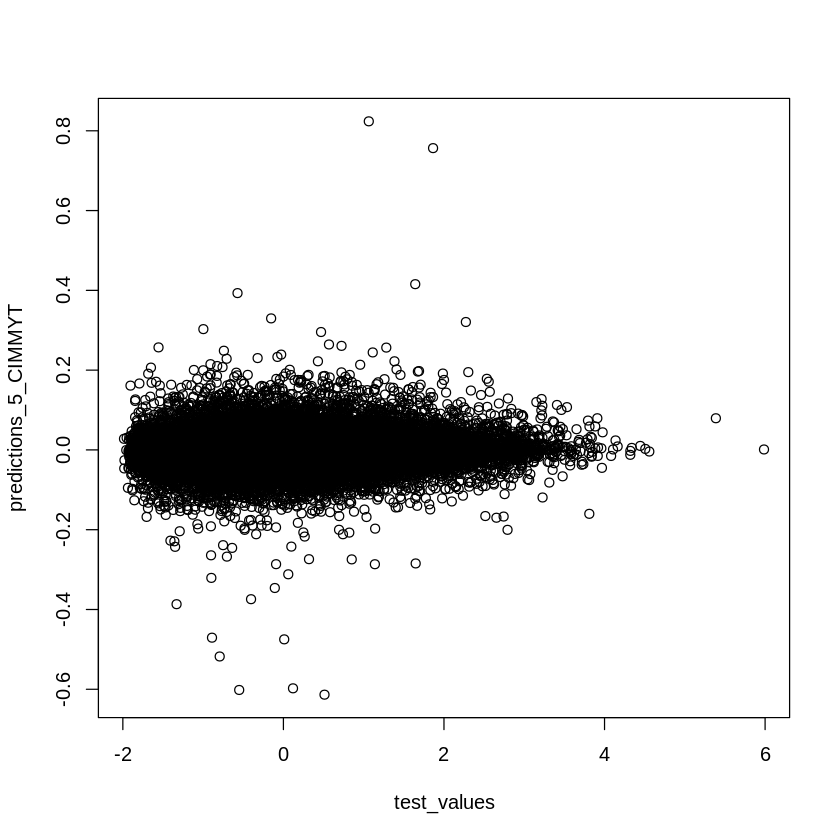

In [73]:
predictions_5_CIMMYT = fm5_CIMMYT$yHat[-seq_len(train_rows)]
test_values = y_sample$GRAIN_YIELD[-seq_len(train_rows)]
corr = cor(predictions_5_CIMMYT, test_values)
R2 = R2(predictions_5_CIMMYT, test_values)
RMSE = RMSE(predictions_5_CIMMYT, test_values)
MAE = MAE(predictions_5_CIMMYT, test_values)
model5_CIMMYT_scores = data.frame(R2, corr, RMSE, MAE)
print(model5_CIMMYT_scores)
plot(test_values,predictions_5_CIMMYT)

In [ ]:
remove(L2, W_matrix, K, WW)
# Garbage Collector to Clear up RAM
gc()

In [ ]:
# Fitting Model 5 (Main Environment-Pedigree-Environmental Covariate Effects 
# with Pedigree-Environmental Covariate Interaction)
# (EAW-AxW) GEE

# ZAZ = tcrossprod(Z_star) # Already run above

W_matrix = as.matrix(W_gee_sample_div)

WW = tcrossprod(W_matrix)

K = ZAZ*WW
diag(K) = diag(K)+1/200 
K = K/mean(diag(K))
L2 = t(chol(K))

In [ ]:
ETA = list(PED=list(X=Z_star,model='BRR'),
           EC=list(X=W_matrix,model='BRR'),
           AxW=list(X=L2,model='BRR'))

In [ ]:
fm5_gee = BGLR(y=y_train_na,ETA=ETA, saveAt='M4_',nIter=500,burnIn=200)

In [ ]:
predictions_5_GEE = fm5_gee$yHat[-seq_len(train_rows)]
test_values = y_sample$GRAIN_YIELD[-seq_len(train_rows)]
R2 = R2(predictions_5_GEE, test_values)
corr = cor(predictions_5_GEE, test_values)
RMSE = RMSE(predictions_5_GEE, test_values)
MAE = MAE(predictions_5_GEE, test_values)
model5_GEE_scores = data.frame(R2, corr, RMSE, MAE)
print(model5_GEE_scores)
plot(test_values,predictions_5_GEE)